In [53]:
%pylab
%matplotlib inline

import pandas as pd
import datetime as dt

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


C:\Users\ghage\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [54]:
path = r'C:\Users\ghage\Documents\Diabetes'
filename = r'\GerardHager_glucose_17-5-2021.csv'

In [100]:
df = pd.read_csv(path + filename, usecols=[2, 4], skiprows=[0]).dropna()

In [116]:
df.columns = ['Timestamp', 'Bg']

In [101]:
df

,Device Timestamp,Historic Glucose mmol/L
0,23-04-2020 01:26 PM,18.7
1,23-04-2020 01:42 PM,17.1
2,23-04-2020 01:57 PM,15.7
3,23-04-2020 02:12 PM,15.0
4,23-04-2020 02:27 PM,15.5
...,...,...
34957,17-05-2021 09:30 AM,4.3
34958,17-05-2021 09:45 AM,4.5
34959,17-05-2021 10:00 AM,5.2
34960,17-05-2021 10:15 AM,6.2


In [102]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format="%d-%m-%Y %I:%M %p")

In [103]:
df

,Device Timestamp,Historic Glucose mmol/L
0,2020-04-23 13:26:00,18.7
1,2020-04-23 13:42:00,17.1
2,2020-04-23 13:57:00,15.7
3,2020-04-23 14:12:00,15.0
4,2020-04-23 14:27:00,15.5
...,...,...
34957,2021-05-17 09:30:00,4.3
34958,2021-05-17 09:45:00,4.5
34959,2021-05-17 10:00:00,5.2
34960,2021-05-17 10:15:00,6.2


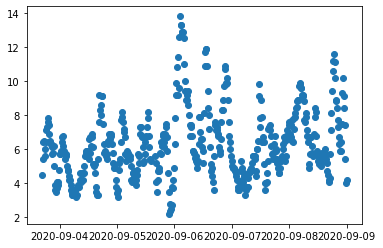

In [115]:
start, end = 11500, 12000
plot(df.iloc[start:end, 0], df.iloc[start:end, 1], 'o')

In [107]:
rel_epoch_time = (df['Timestamp'] - df['Timestamp'][0]).dt.total_seconds()

In [129]:
df['avg14'] = df['Bg'].rolling(14*20, min_periods=1, center=True, closed='neither').mean()

In [131]:
df['std14'] = df['Bg'].rolling(14*20, min_periods=1, center=True, closed='neither').std()

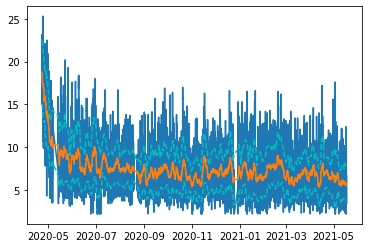

In [143]:
plot(df['Timestamp'], df['Bg'])
plot(df['Timestamp'], df['avg14'])
plot(df['Timestamp'][::100], (df['avg14'] + df['std14'])[::100], 'c--')
plot(df['Timestamp'][::100], (df['avg14'] - df['std14'])[::100], 'c--')

In [144]:
df['var14'] = df['Bg'].rolling(14*20, min_periods=1, center=True, closed='neither').var()

In [146]:
df['var90'] = df['Bg'].rolling(90*20, min_periods=1, center=True, closed='neither').var()

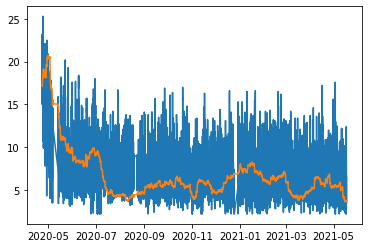

In [147]:
plot(df['Timestamp'], df['Bg'])
plot(df['Timestamp'], df['var90'])

In [148]:
bg_df = df
%store bg_df

Stored 'bg_df' (DataFrame)
